# Numpy Basics

Numpy is a library for matrix algebra inspired from MATLAB, quite efficient, and with a nice Python API. It is easy to learn, but also has a nice reference manual (access via a search engine) and after a while becomes quite natural to use.

Indexing starts at 0, Boolean indices are supported, broadcasting is applied (e.g., to apply an operation over a sequence of things if it does not fit the thing, see below).

# Generator

A generator is a function which creates a data object, tries giving it to someone else waiting for it to be taken. It returns an object on which next() gets the next value. If the generator function exists (for whatever reason) this is to be interpreted as the end of sequence and generates a StopIteration exception. The for loop (and list expressions) correctly absorb it.



In [31]:
def generator_example():
    for i in range(10):
        if (i==4):
            return
        yield i;

l = [x for x in generator_example()]
        
        
a = generator_example() # the generator function returns a generator, though it does not "return"
# on this object, next() can be called

# Loop throgh iterator until termination
for x in a:
    print(x)
a = generator_example();
print(l)
#b = next(a)
## This gives the "next" yield
#print(b)
#c = next(a)
#print(c)


0
1
2
3
[0, 1, 2, 3]


In [32]:
L = [1,2,3,5,4,3]

def doubling_generator(mylist):
    # reason A: you want a local variable per iteration
    for i in mylist:
        yield i*2


for x in doubling_generator(L):
    print(x)
    
# What is the memory consumption here? Exactly one list is in main memory

# Compare to 
Q = [2*x for x in L]
# does the same, but creates a copy. Two times the list in main memory.

2
4
6
10
8
6


In [33]:
# typical pattern: read files one at a time, because not all files fit in main memory
import os

def get_all_files():
    for f in os.listdir("."):
        if f.endswith(".ipynb"):
            # usually this is used for images in deep learning, then you can do preprocessing here as well 
            # decode the image, scale the image, change the colorscheme, subtract the mean, ...
            yield f,open(f).read()
        
for f,x in get_all_files():
    print("Now I can use file %s which has %d bytes." % (f, len(x)))
    


Now I can use file 00_NumpyBasics.ipynb which has 60807 bytes.
Now I can use file 01b Neural Network Python.ipynb which has 565697 bytes.


UnicodeDecodeError: 'charmap' codec can't decode byte 0x81 in position 12441: character maps to <undefined>

Hence, the idea of generators is basically to loop over things in a way such that only one thing needs to be processed and held in main memory and that you can interrupt the procedure whenever you want or even make it infinite without any problem. Therefore, just add while true to the generator

In [36]:
# Assume you are training a deep neural network and all ipynb files are your training examples. You want to train for many
# epochs which means that you give all the data to the training algorithm over and over again. And you want to shuffle which
# means you give it it random order each time, but not totally random, in each epoch you show each image once.
import numpy as np;
def training_data_generator():
    files = np.array([x for x in os.listdir(".") if x.endswith(".ipynb")])
    while True: # for each epoch infinitely
#        i = [x for x in range(len(files))]
        np.random.shuffle(files)
        for x in files:
            yield x
            
for i,data in enumerate(training_data_generator()):
    print(data)
    if (i > 10):
        break

02_tensorflow_keras.ipynb
03_tensorflow_xor.ipynb
00_NumpyBasics.ipynb
05_MobileComputerVision.ipynb
04_TensorflowMNIST.ipynb
01b Neural Network Python.ipynb
00_NumpyBasics.ipynb
04_TensorflowMNIST.ipynb
03_tensorflow_xor.ipynb
01b Neural Network Python.ipynb
05_MobileComputerVision.ipynb
02_tensorflow_keras.ipynb


# Generator Expressions


In [37]:
gen = (x for x in range(10))
print(next(gen))
print(next(gen))
print(next(gen))
print(next(gen))
print(next(gen))
print(next(gen))

0
1
2
3
4
5


In [38]:
import os
import imageio
imagegenerator = (open(imagefilename).read() for imagefilename in (f for f in os.listdir() if f.endswith(".ipynb")))
next(imagegenerator)
next(imagegenerator)


'{\n "cells": [\n  {\n   "cell_type": "markdown",\n   "metadata": {},\n   "source": [\n    "# A Simple Neural Network - Complete Example\\n",\n    "\\n",\n    "\\n",\n    "simplified and explained from https://towardsdatascience.com/lets-code-a-neural-network-in-plain-numpy-ae7e74410795"\n   ]\n  },\n  {\n   "cell_type": "code",\n   "execution_count": 1,\n   "metadata": {},\n   "outputs": [],\n   "source": [\n    "import numpy as np\\n",\n    "from matplotlib import pyplot as plt\\n",\n    "from tqdm.notebook import tqdm\\n"\n   ]\n  },\n  {\n   "cell_type": "code",\n   "execution_count": 2,\n   "metadata": {},\n   "outputs": [\n    {\n     "name": "stdout",\n     "output_type": "stream",\n     "text": [\n      "X:  (1797, 8, 8) float64\\n",\n      "y:  (1797,) int32\\n",\n      "[[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]\\n",\n      " [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]\\n",\n      " [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]\\n",\n      " [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]\\n",\n      " [0. 0. 0. 0. 1. 0. 0. 0.

In [39]:
import numpy as np;
from matplotlib import pyplot as plt

# basic type: np.ndarray

m = np.array([1,2,3,4])
print(m)

[1 2 3 4]


In [40]:
m = np.array([[1,2],[3,4]], dtype=np.int_)

In [41]:
print(m)

[[1 2]
 [3 4]]


In [42]:
print(np.transpose(m))


[[1 3]
 [2 4]]


In [43]:
# many operations are in place (such that you cannot use the return value; increases efficiency)
np.random.shuffle(m)
print(m)


[[1 2]
 [3 4]]


In [44]:
# Operations go to the first axis (if unclear)
# Broadcasting is applied along first axis as well. For example
m = m + [1,2] # adds 1,2 to each row
print(m)

[[2 4]
 [4 6]]


In [45]:
# This is wrong even though it fits second axis. Broadcasting fails
m = np.array([[1,2,2],[3,4,2],[5,6,2]])
print(m.shape)
m = m+ [1,1,1]
print(m)

(3, 3)
[[2 3 3]
 [4 5 3]
 [6 7 3]]


# Shapes, Stacking, Slicing and Booleans

In [50]:
m = np.random.uniform(low=0, high=3, size=100).reshape(-1,2) # shape (50,2)
n = np.random.uniform(low=0, high=3, size=100).reshape(-1,2) # shape (50,2)
x = np.vstack([m,n]) # vertically stack them
y = np.hstack([m,n]) # horizontally stack them
z = np.stack([m,n])
print("X = vstack = ", x.shape)
print("Y = hstack = ", y.shape)
print("Z = stack = ", z.shape)
print(x)



X = vstack =  (100, 2)
Y = hstack =  (50, 4)
Z = stack =  (2, 50, 2)
[[1.34004263 0.10337472]
 [0.63851127 2.58976037]
 [1.48671304 1.97827735]
 [0.566642   2.53128509]
 [0.07519716 0.66768854]
 [0.3292025  0.27297407]
 [2.48864932 0.82238917]
 [0.22757574 1.5420916 ]
 [0.67524035 0.00461717]
 [2.1086217  0.56241318]
 [0.45588087 1.41216117]
 [0.00403468 1.01886642]
 [2.84139388 0.37286572]
 [2.22560987 2.31498219]
 [2.39664509 2.0020763 ]
 [1.52483746 1.95551416]
 [0.47344884 2.96950658]
 [1.08667097 0.09571171]
 [2.87255916 2.37401307]
 [2.51962066 1.74743938]
 [0.49380684 1.33750245]
 [1.38414426 0.12463366]
 [2.87758545 1.46945755]
 [2.14224606 1.99357624]
 [0.77247378 1.95790824]
 [2.43900845 0.908323  ]
 [1.71689058 1.09894569]
 [0.83769325 2.85481038]
 [0.32462159 0.40049633]
 [1.9474073  0.96835801]
 [0.0154653  1.94157586]
 [1.8971858  1.91318376]
 [0.00702289 1.1089598 ]
 [0.32865421 0.02348805]
 [2.13463483 2.79938599]
 [1.33373661 2.93494167]
 [0.13293211 0.71004866]
 [1.39

In [51]:
# slicing
print(x[:3])
print(x[97:]) 
print(y[:,-1]) # last one in second axis
# boolean slicing
xint = x.astype(np.int_)
print(np.unique(xint))
# counting is helpful sometimes
values, counts = np.unique(xint, return_counts =True)
for v,c in zip(values,counts):
    print("Found value %d exactly %d times" %(v,c))

[[1.34004263 0.10337472]
 [0.63851127 2.58976037]
 [1.48671304 1.97827735]]
[[0.60339683 2.24948162]
 [0.18784897 1.34939155]
 [0.63108273 1.36902897]]
[2.91642574 0.41735967 2.55291669 1.09372575 0.28458239 0.3323958
 2.23442532 0.56805139 2.53662751 0.98148646 2.5757782  0.53192538
 1.39163075 2.42255296 1.6121072  1.79197417 1.86398322 1.57633119
 1.15027776 2.38718424 1.49736245 1.68337829 1.21981496 0.98865073
 2.57519179 2.9750869  1.78032243 1.2834821  0.50458306 1.00519379
 2.5627023  1.25393255 1.03294915 1.18206015 1.99746914 0.05143982
 0.91953944 1.95691175 0.75584188 1.20106743 1.09244209 0.96565814
 1.61092116 0.82263465 2.3994806  0.19982883 0.53768791 2.24948162
 1.34939155 1.36902897]
[0 1 2]
Found value 0 exactly 71 times
Found value 1 exactly 79 times
Found value 2 exactly 50 times


[[0.63851127 2.58976037]
 [0.566642   2.53128509]
 [0.07519716 0.66768854]
 [0.3292025  0.27297407]
 [0.22757574 1.5420916 ]
 [0.67524035 0.00461717]
 [0.45588087 1.41216117]
 [0.00403468 1.01886642]
 [0.47344884 2.96950658]
 [0.49380684 1.33750245]
 [0.77247378 1.95790824]
 [0.83769325 2.85481038]
 [0.32462159 0.40049633]
 [0.0154653  1.94157586]
 [0.00702289 1.1089598 ]
 [0.32865421 0.02348805]
 [0.13293211 0.71004866]
 [0.74318664 0.73906141]
 [0.07594893 1.49210826]
 [0.45616184 2.91642574]
 [0.06240227 0.56805139]
 [0.34589183 2.53662751]
 [0.85980149 2.5757782 ]
 [0.43125332 2.42255296]
 [0.62649706 1.21981496]
 [0.8057996  0.50458306]
 [0.67163587 1.03294915]
 [0.06121271 1.18206015]
 [0.97976481 1.99746914]
 [0.76803783 0.91953944]
 [0.52795198 0.75584188]
 [0.02696683 1.20106743]
 [0.27566949 1.61092116]
 [0.12728065 0.19982883]
 [0.60339683 2.24948162]
 [0.18784897 1.34939155]
 [0.63108273 1.36902897]]


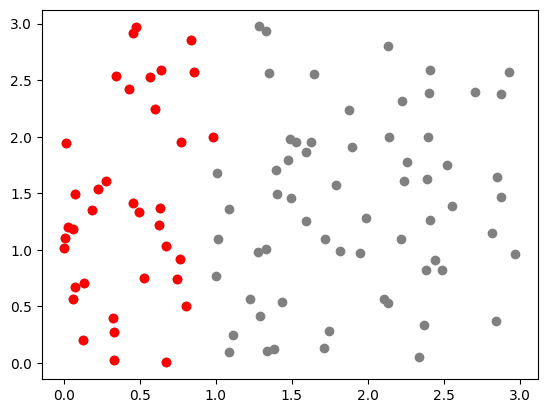

In [52]:
# boolean index
y = x[xint[:,0] == 0,:] # all entries where x is zero
print(y)
plt.scatter(x[:,0], x[:,1], color="gray")
plt.scatter(y[:,0],y [:,1], color="red")

# Summary:

numpy is a swiss army knife for numeric operations and provides many features from linear algebra (np.linalg). It is very efficient in that it works on raw pointers. It can even exchange values with external libraries via the Python Buffer Interface without copying. Therefore, a good choice for numeric computations.